# 수업 방식에 따라 마일리지 난이도에 차이가 있을까?
---

### 1. 서론

#### (1) 의문점
- 비대면이 쉬었다? 블렌딩이 쉬었다?
- 과연 어떤 강의 방식일때가 가장 마일리지 수강신청 난이도가 높았을까?

#### (2) 데이터
- **마일리지 난이도** : 두가지 측면
  - 과목별 마일리지 커트라인
  - 수강신청 성공자 수 / 수강 신청자 수
- 전처리한 csv 파일 대략적으로 설명

### 2. 그래프

#### (1) 단순 bar plot
- 두 가지 측면의 마일리지 난이도를 확인해보았을 때 그렇게 큰 차이를 보이는 것 같지는 않음
- 혹시 전공자 정원 포함 / 미포함에 따라 뭔가 차이가 있을까 해서 보았는데도 큰 추세가 보이진 않음

### 3. 통계 분석

#### (1) Kruskal-Walis test
- 독립성, 정규성 만족하지 않으므로 세 그룹 간 Y변수 차이가 있는지 확인하기 위해 Kruskal-Walis test 진행

- 좀 더 정확한 검정 결과를 위해 (수업명, 교수명)을 기준으로 Row를 구성하고 Column에 각 그룹에 해당하는 Y변수 값들이 오게 데이터를 설정
- 비교해보니 모든 Y변수에서 유의하지 않음

#### (2) 그럼에도 불구하고?
- 혹시 딱히 경쟁률이 없는 이상치 데이터가 통계를 망치고 있는 건 아닐까?
- 마일리지 커트가 1 (어떤 마일리지를 넣어도 성공했을 강의)인 강의 제외하고 test
- p-value가 조금 낮아지긴 했지만 결과는 동일

#### (3) 그렇다면 어떤 변수가?
- 교바교일까?
- 회귀분석을 통해 Y변수 ~ 교수 + 강의 방식으로 돌려보니 특정 교수님들에게 coef가 유의하게 나왔음
- 따라서 각 수업별로 (특히, 각 수업별로 교수님들이 어느정도 있고 고정되어 있는 강의들) 데이터를 분리해보았을 때 교수님에 따라 결과가 유의한 지 회귀분석 돌려봄
- Covariates로 강의 방식을 넣었음에도 교바교로 coef가 유의한 교수님들이 몇 분 계셨음
- 예시로 하나 찍어서 보여줌 (회계원리(1)이 나을듯?)


### 4. 결론
- 비대면, 대면, 블렌딩이든 역시 마일리지 난이도는 교바교이다!

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/23-2_DSL/EDA/finaldata.csv', delimiter = ',')

In [5]:
data.head()

,year,semester,lecture_type,prof,name,class,prob_success,prob_success_m,prob_success_um,mileage_cut,mileage_cut_m,mileage_cut_um
0,2022,1,1,김일문,수리통계학(2),None,0.889,1.000,0.724,3,1.0,3.0
1,2021,2,1,강승호,수리통계학(2),None,0.797,0.930,0.524,12,2.0,12.0
2,2021,1,0,임종호,수리통계학(2),None,0.988,1.000,0.958,1,1.0,1.0
3,2020,2,1,강승호,수리통계학(2),None,0.835,1.000,0.612,12,1.0,12.0
4,2022,2,1,김일문,수리통계학(2),None,0.586,0.909,0.160,12,2.0,12.0


In [6]:
target_col = ['prof', 'name', 'lecture_type', 'prob_success', 'prob_success_m', 'prob_success_um', 'mileage_cut', 'mileage_cut_m', 'mileage_cut_um']
subdata = data[target_col]
subdata

,prof,name,lecture_type,prob_success,prob_success_m,prob_success_um,mileage_cut,mileage_cut_m,mileage_cut_um
0,김일문,수리통계학(2),1,0.889,1.000,0.724,3,1.0,3.0
1,강승호,수리통계학(2),1,0.797,0.930,0.524,12,2.0,12.0
2,임종호,수리통계학(2),0,0.988,1.000,0.958,1,1.0,1.0
3,강승호,수리통계학(2),1,0.835,1.000,0.612,12,1.0,12.0
4,김일문,수리통계학(2),1,0.586,0.909,0.160,12,2.0,12.0
...,...,...,...,...,...,...,...,...,...
497,정종희,알파프,0,0.561,1.000,0.444,12,1.0,12.0
498,한솔지,알파프,0,0.521,1.000,0.079,12,1.0,12.0
499,한솔지,알파프,2,0.434,1.000,0.302,12,1.0,12.0
500,한솔지,알파프,0,0.650,1.000,0.488,12,1.0,12.0


In [7]:
subdata['id'] = subdata['prof'] + "_" +  subdata['name']
subdata

<ipython-input-7-cb61bba33fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['id'] = subdata['prof'] + "_" +  subdata['name']


,prof,name,lecture_type,prob_success,prob_success_m,prob_success_um,mileage_cut,mileage_cut_m,mileage_cut_um,id
0,김일문,수리통계학(2),1,0.889,1.000,0.724,3,1.0,3.0,김일문_수리통계학(2)
1,강승호,수리통계학(2),1,0.797,0.930,0.524,12,2.0,12.0,강승호_수리통계학(2)
2,임종호,수리통계학(2),0,0.988,1.000,0.958,1,1.0,1.0,임종호_수리통계학(2)
3,강승호,수리통계학(2),1,0.835,1.000,0.612,12,1.0,12.0,강승호_수리통계학(2)
4,김일문,수리통계학(2),1,0.586,0.909,0.160,12,2.0,12.0,김일문_수리통계학(2)
...,...,...,...,...,...,...,...,...,...,...
497,정종희,알파프,0,0.561,1.000,0.444,12,1.0,12.0,정종희_알파프
498,한솔지,알파프,0,0.521,1.000,0.079,12,1.0,12.0,한솔지_알파프
499,한솔지,알파프,2,0.434,1.000,0.302,12,1.0,12.0,한솔지_알파프
500,한솔지,알파프,0,0.650,1.000,0.488,12,1.0,12.0,한솔지_알파프


In [8]:
from scipy import stats

In [9]:
def kruskal_test(pivot):
  result_list = []
  on = pivot[0].reset_index(drop=True)
  on_off = pivot[1].reset_index(drop=True)
  off = pivot[2].reset_index(drop=True)
  result1 = stats.kruskal(on, on_off, nan_policy='omit')[1].round(3)
  result2 = stats.kruskal(on_off, off, nan_policy='omit')[1].round(3)
  result3 = stats.kruskal(on, off, nan_policy = 'omit')[1].round(3)
  result_total = stats.kruskal(on, on_off, off, nan_policy = 'omit')[1].round(3)
  result_list.append(result1)
  result_list.append(result2)
  result_list.append(result3)
  result_list.append(result_total)
  return(result_list)

## Kruskal-Walis test

In [11]:
mile_pivot = pd.pivot_table(subdata, values='mileage_cut', index=['id'],
                    columns=['lecture_type'], aggfunc=np.mean)

mile_m_pivot = pd.pivot_table(subdata, values='mileage_cut_m', index=['id'],
                    columns=['lecture_type'], aggfunc=np.mean)

mile_um_pivot = pd.pivot_table(subdata, values='mileage_cut_um', index=['id'],
                    columns=['lecture_type'], aggfunc=np.mean)

prob_success_pivot = pd.pivot_table(subdata, values='prob_success', index=['id'],
                    columns=['lecture_type'], aggfunc=np.mean)

prob_success_m_pivot = pd.pivot_table(subdata, values='prob_success_m', index=['id'],
                    columns=['lecture_type'], aggfunc=np.mean)

prob_success_um_pivot = pd.pivot_table(subdata, values='prob_success_um', index=['id'],
                    columns=['lecture_type'], aggfunc=np.mean)

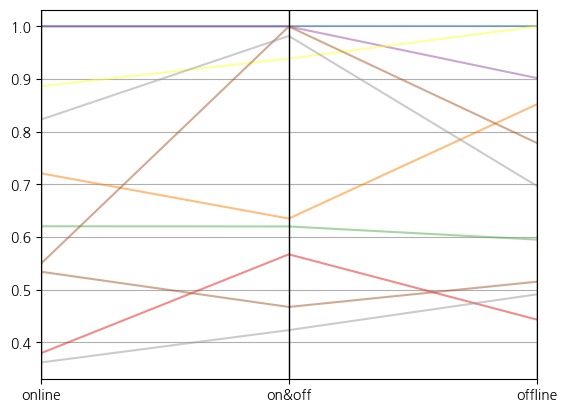

In [76]:
from pandas.plotting import parallel_coordinates as pc
import matplotlib.pyplot as plt

data = prob_success_pivot
data.columns = ['online', 'on&off', 'offline']
data = data.reset_index()

data
pc(data.dropna(), class_column = 'id', alpha = 0.5, colormap = plt.get_cmap('Set1')).get_legend().remove()
#frame = : 데이터 프레임 입력
#class_column = : 클래스 네임을 포함하는 컬럼 이름 입력
#colormap =  : 사용할 colormap 이름

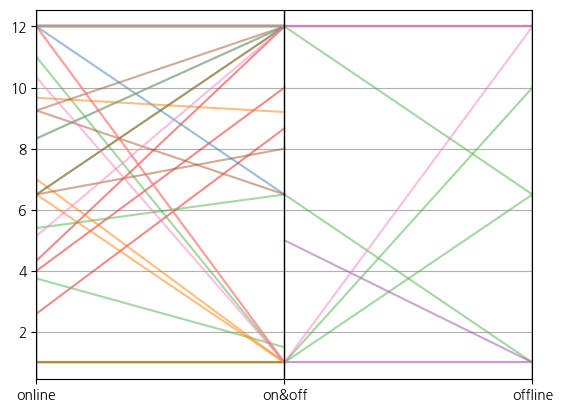

In [77]:
data2 = mile_pivot
data2.columns = ['online', 'on&off', 'offline']
data2 = data2.reset_index()

pc(data2, class_column = 'id', alpha = 0.5, colormap = plt.get_cmap('Set1')).get_legend().remove()
#frame = : 데이터 프레임 입력
#class_column = : 클래스 네임을 포함하는 컬럼 이름 입력
#colormap =  : 사용할 colormap 이름

In [14]:
result_df = pd.DataFrame()
a = kruskal_test(mile_pivot)
result_df['마일리지 커트 기준 (전체)'] = a

b = kruskal_test(mile_m_pivot)
result_df['마일리지 커트 기준 (전공자 정원 포함 인원)'] = b

c = kruskal_test(mile_um_pivot)
result_df['마일리지 커트 기준 (전공자 정원 미포함 인원)'] = c

d = kruskal_test(prob_success_pivot)
result_df['수강신청 수 대비 신청 성공 비율 (전체)'] = d

e = kruskal_test(prob_success_m_pivot)
result_df['수강신청 수 대비 신청 성공 비율 (전공자 정원 포함 인원)'] = e

f = kruskal_test(prob_success_um_pivot)
result_df['수강신청 수 대비 신청 성공 비율 (전공자 정원 미포함 인원)'] = f

new_index = ['비대면 vs 블렌디드', '비대면 vs 대면', '블렌디드 vs 대면', '비대면 vs 블렌디드 vs 대면']
result_df.index = new_index

result_df

,마일리지 커트 기준 (전체),마일리지 커트 기준 (전공자 정원 포함 인원),마일리지 커트 기준 (전공자 정원 미포함 인원),수강신청 수 대비 신청 성공 비율 (전체),수강신청 수 대비 신청 성공 비율 (전공자 정원 포함 인원),수강신청 수 대비 신청 성공 비율 (전공자 정원 미포함 인원)
비대면 vs 블렌디드,0.807,0.969,0.891,0.357,0.312,0.717
비대면 vs 대면,0.826,0.311,0.205,0.577,0.047,0.484
블렌디드 vs 대면,0.601,0.311,0.115,0.838,0.178,0.213
비대면 vs 블렌디드 vs 대면,0.878,0.531,0.283,0.654,0.122,0.491


기준으로 잡은 교수와 수업에 마일리지 주관이 묶여있을 수 있다?

마일리지 난이도로 비교해보자! (1이 아니거나 12가 아니거나)

경영학과의 분반별 수업 신청 특징

## 마일리지 커트가 All 1인 경우를 제외한다 ! (각 비교군에서)
- 마일리지 커트가 1이라는 것은 어떤 마일리지를 넣어도 수강이 가능했다는 뜻이므로 이런 강의를 제외하였을 때 어떤 형태가 나오는 지?

In [15]:
temp = mile_pivot[(mile_pivot[0] != 1.0) & (mile_pivot[1] !=1.0)][[0,1]]
stats.kruskal(temp[0], temp[1], nan_policy='omit')[1]
stats.kruskal(mile_pivot[0], mile_pivot[1], nan_policy='omit')[1]
temp[0]

id
강성봉_미분적분학              NaN
강성봉_선형대수             9.333333
강승호_수리통계학(2)              NaN
고덕기_거시경제원론               NaN
고민정_마케팅                12.000000
                                  ...    
한원용_미시경제원론       12.000000
한원용_미시경제학           4.666667
한재훈_재무관리                    NaN
허대식_생산및운영관리     9.250000
허현승_거시경제학            8.333333
Name: 0, Length: 121, dtype: float64

In [16]:
def kruskal_test2(pivot):
  result_list = []
  pivot1 = pivot[(pivot[0] != 1.0) & (pivot[1] !=1.0)][[0,1]]
  pivot2 = pivot[(pivot[1] != 1.0) & (pivot[2] !=1.0)][[1,2]]
  pivot3 = pivot[(pivot[0] != 1.0) & (pivot[2] !=1.0)][[0,2]]
  pivot_total = pivot[(pivot[0] != 1.0) & (pivot[1] !=1.0) & (pivot[2] != 1.0)]
  result1 = stats.kruskal(pivot1[0], pivot1[1], nan_policy='omit')[1].round(3)
  result2 = stats.kruskal(pivot2[1], pivot2[2], nan_policy='omit')[1].round(3)
  result3 = stats.kruskal(pivot3[0], pivot3[2], nan_policy = 'omit')[1].round(3)
  result_total = stats.kruskal(pivot_total[0], pivot_total[1], pivot_total[2], nan_policy = 'omit')[1].round(3)
  result_list.append(result1)
  result_list.append(result2)
  result_list.append(result3)
  result_list.append(result_total)
  return(result_list)

In [17]:
result_df2 = pd.DataFrame()
a2 = kruskal_test2(mile_pivot)
result_df['마일리지 커트 기준 (전체)'] = a2

b2 = kruskal_test2(mile_m_pivot)
result_df2['마일리지 커트 기준 (전공자 정원 포함 인원)'] = b2

c2 = kruskal_test2(mile_um_pivot)
result_df2['마일리지 커트 기준 (전공자 정원 미포함 인원)'] = c2

d2 = kruskal_test2(prob_success_pivot)
result_df2['수강신청 수 대비 신청 성공 비율 (전체)'] = d2

e2 = kruskal_test2(prob_success_m_pivot)
result_df2['수강신청 수 대비 신청 성공 비율 (전공자 정원 포함 인원)'] = e2

f2 = kruskal_test2(prob_success_um_pivot)
result_df2['수강신청 수 대비 신청 성공 비율 (전공자 정원 미포함 인원)'] = f2

new_index2 = ['비대면 vs 블렌디드', '비대면 vs 대면', '블렌디드 vs 대면', '비대면 vs 블렌디드 vs 대면']
result_df2.index = new_index2

result_df2

,마일리지 커트 기준 (전공자 정원 포함 인원),마일리지 커트 기준 (전공자 정원 미포함 인원),수강신청 수 대비 신청 성공 비율 (전체),수강신청 수 대비 신청 성공 비율 (전공자 정원 포함 인원),수강신청 수 대비 신청 성공 비율 (전공자 정원 미포함 인원)
비대면 vs 블렌디드,0.499,0.964,0.263,0.179,0.579
비대면 vs 대면,0.293,0.270,0.987,0.932,0.499
블렌디드 vs 대면,0.322,0.068,0.208,0.475,0.054
비대면 vs 블렌디드 vs 대면,0.696,0.374,0.300,0.354,0.217


## 그렇다면, 마일리지 커트나 수강신청 수 대비 신청 성공 비율에 영향을 끼치는 변수는 무엇일까?

### 1. 과목이 영향을 끼친다? - 미미함
### 2. 과목 당 교수님들이 영향을 끼친다? - Yes!

In [18]:
import statsmodels.formula.api as lm

In [19]:
subdata['name'].unique()

array(['수리통계학(2)', '회계원리(1)', '전략경영', '재정학',
       '수리통계학(1)', '회귀분석', '통계방법론', '재무관리',
       '조직행동론', '경영정보시스템', '미시경제원론',
       '미시경제학', '마케팅', '경영과학', '계량경제학(1)',
       '딥러닝', '생산및운영관리', '계약및조직이론',
       '거시경제원론', '게임이론과응용', '거시경제학',
       '회계원리(2)', '미분적분학', '선형대수', '알파프'],
      dtype=object)

In [20]:
stats_subdata = subdata.groupby('prof').mean()[['prob_success', 'mileage_cut']]
minvalue = min(stats_subdata['mileage_cut'])
maxvalue = max(stats_subdata['mileage_cut'])
# min-max scaling
stats_subdata['mileage_cut'] = (stats_subdata['mileage_cut'] - minvalue)/(maxvalue - minvalue)
stats_subdata = stats_subdata.reset_index()
stats_subdata

<ipython-input-20-a5b8ca22c722>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_subdata = subdata.groupby('prof').mean()[['prob_success', 'mileage_cut']]


,prof,prob_success,mileage_cut
0,강성봉,0.585167,0.878788
1,강승호,0.816000,1.000000
2,고덕기,0.932000,0.000000
3,고민정,0.442000,1.000000
4,구본일,0.559500,1.000000
...,...,...,...
121,한원용,0.833769,0.461538
122,한재훈,0.540500,1.000000
123,허대식,0.809833,0.833333
124,허현승,0.782000,0.800000


In [21]:
import matplotlib.font_manager as fm
import matplotlib as mpl

sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font))) # 나눔 폰트 없음.

!apt-get update -qq
!apt-get install fonts-nanum* -qq

sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
mpl.rcParams['axes.unicode_minus'] = False # 그래프의 x, y축에 정상적인 - 표시 설정

sys_font number : 17
['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/li

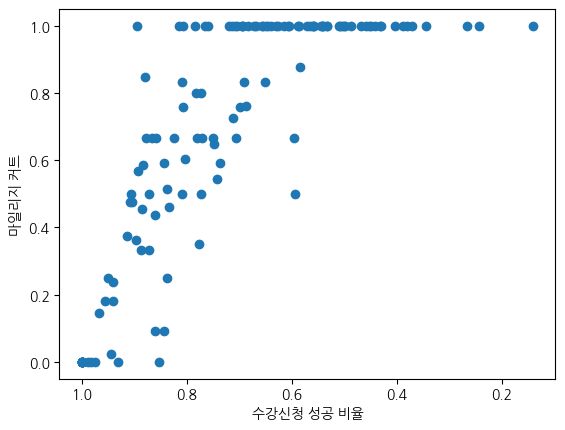

In [22]:
plt.scatter(stats_subdata['prob_success'], stats_subdata['mileage_cut'])

# 각 점에 해당하는 id 표시
#for i, id in enumerate(stats_subdata['prof']):
#    plt.text(stats_subdata['prob_success'][i], stats_subdata['mileage_cut'][i], id)

# 축 레이블 추가
plt.xlabel('수강신청 성공 비율')
plt.ylabel('마일리지 커트')
plt.gca().invert_xaxis()

# 그래프 표시
plt.show()


In [23]:
stats_subdata

,prof,prob_success,mileage_cut
0,강성봉,0.585167,0.878788
1,강승호,0.816000,1.000000
2,고덕기,0.932000,0.000000
3,고민정,0.442000,1.000000
4,구본일,0.559500,1.000000
...,...,...,...
121,한원용,0.833769,0.461538
122,한재훈,0.540500,1.000000
123,허대식,0.809833,0.833333
124,허현승,0.782000,0.800000


In [89]:
stats_subdata

,prof,prob_success,mileage_cut
0,강성봉,0.585167,0.878788
1,강승호,0.816000,1.000000
2,고덕기,0.932000,0.000000
3,고민정,0.442000,1.000000
4,구본일,0.559500,1.000000
...,...,...,...
121,한원용,0.833769,0.461538
122,한재훈,0.540500,1.000000
123,허대식,0.809833,0.833333
124,허현승,0.782000,0.800000


In [86]:
import plotly.express as px

#그래프 그리기
#fig = px.scatter(stats_subdata, x="prob_success", y="mileage_cut", trendline="ols", trendline_options=dict(log_x=True), trendline_color_override="red")
fig = px.scatter(stats_subdata, x="prob_success", y="mileage_cut")
#fig.update_yaxes(range=[0, 1.1])
fig.update_xaxes(range=[stats_subdata["prob_success"].max(), stats_subdata["prob_success"].min()])
fig.update_xaxes(title="수강신청 성공비율")
fig.update_yaxes(title="마일리지 커트")
fig.show()

In [32]:
def sub_regres():

  #1. mileage cut
  model_mileage = lm.ols('mileage_cut ~ name + lecture_type', data=subdata)
  result_mileage = model_mileage.fit()
  print("마일리지 커트 기준")
  print(result_mileage.params[result_mileage.pvalues < 0.05])
  print("\n")

  #2. prob

  model_prob = lm.ols('prob_success ~ name + lecture_type', data=subdata)
  result_prob = model_prob.fit()
  print("수강 성공 비율 기준")
  print(result_prob.params[result_prob.pvalues < 0.05])
  print("\n")

  return(None)

In [33]:
sub_regression()

마일리지 커트 기준
Intercept                     8.038123
name[T.경영정보시스템]   -3.513339
name[T.미시경제원론]       3.835135
dtype: float64


수강 성공 비율 기준
Intercept                  0.742581
name[T.미시경제원론]   -0.199905
name[T.알파프]           -0.200744
name[T.재정학]          -0.299143
dtype: float64




In [34]:
def prof_total_regression():
  data = subdata

  #1. mileage cut
  model_mileage = lm.ols('mileage_cut ~ prof + lecture_type', data=data)
  result_mileage = model_mileage.fit()
  print("마일리지 커트 기준")
  print(result_mileage.params[result_mileage.pvalues < 0.05])
  print("\n")

  #2. prob

  model_prob = lm.ols('prob_success ~ prof + lecture_type', data=data)
  result_prob = model_prob.fit()
  print("수강 성공 비율 기준")
  print(result_prob.params[result_prob.pvalues < 0.05])
  print("\n")

  return(None)

In [35]:
prof_total_regression()

마일리지 커트 기준
Intercept                 10.580128
prof[T.고덕기]           -9.753205
prof[T.권구혁]          -5.737580
prof[T.기랄안드레스]    -4.362580
prof[T.김기범]          -9.580128
prof[T.김미정]          -6.000000
prof[T.김영찬]         -9.666667
prof[T.김재혁]          -9.580128
prof[T.김종환]         -4.654304
prof[T.김철영]         -6.938301
prof[T.김철응]         -9.416667
prof[T.도보람]           -7.608974
prof[T.민순홍]         -5.498397
prof[T.서길수]           -7.709936
prof[T.손성규]          -5.971154
prof[T.손재열]          -8.666667
prof[T.신현한]         -6.873397
prof[T.엄영호]          -9.637820
prof[T.윤대희]           -4.797436
prof[T.이루리]            -5.637820
prof[T.이성원]          -8.580128
prof[T.이주영]           -9.666667
prof[T.이호근]           -7.049359
prof[T.이호영]           -8.083974
prof[T.임건신]         -9.580128
prof[T.임일]            -9.601763
prof[T.임종호]          -9.580128
prof[T.정혜윤] 

In [36]:
def prof_regression(subname):
  data = subdata.loc[subdata['name'] == subname]

  #1. mileage cut
  print(subname, "\n")
  model_mileage = lm.ols('mileage_cut ~ prof + lecture_type', data=data)
  result_mileage = model_mileage.fit()
  print("마일리지 커트 기준")
  print(result_mileage.params[result_mileage.pvalues < 0.05])
  print("\n")

  #2. prob

  model_prob = lm.ols('prob_success ~ prof + lecture_type', data=data)
  result_prob = model_prob.fit()
  print("수강 성공 비율 기준")
  print(result_prob.params[result_prob.pvalues < 0.05])
  print("\n")

  return(None)

In [37]:
for sub in subdata['name'].unique():
  prof_regression(sub)

수리통계학(2) 

마일리지 커트 기준
Series([], dtype: float64)


수강 성공 비율 기준
Intercept    0.601333
dtype: float64


회계원리(1) 

마일리지 커트 기준
Intercept            5.592322
prof[T.김종환]    5.530774
prof[T.박주형]     5.238472
prof[T.이한솔]     6.407678
prof[T.이호영]     -5.096892
prof[T.최원욱]     5.823075
lecture_type         1.753809
dtype: float64


수강 성공 비율 기준
Intercept           0.904800
prof[T.문태곤]   -0.411167
prof[T.박주형]   -0.580045
prof[T.이한솔]   -0.472133
prof[T.최동준]   -0.465101
prof[T.최원욱]   -0.399756
dtype: float64


전략경영 

마일리지 커트 기준
Intercept           4.999837
prof[T.김지현]    7.199902
prof[T.이호욱]     7.266482
dtype: float64


수강 성공 비율 기준
Intercept    0.776593
dtype: float64


재정학 

마일리지 커트 기준
Intercept    12.0
dtype: float64


수강 성공 비율 기준
Series([], dtype: float64)


수리통계학(1) 

마일리지 커트 기준
Series([], dtype: float64)


수강 성공 비율 기준
Series([], dtype: float64)


회귀분석 

마일리지 커트 기준
Intercept    6.777778
dtype: floa

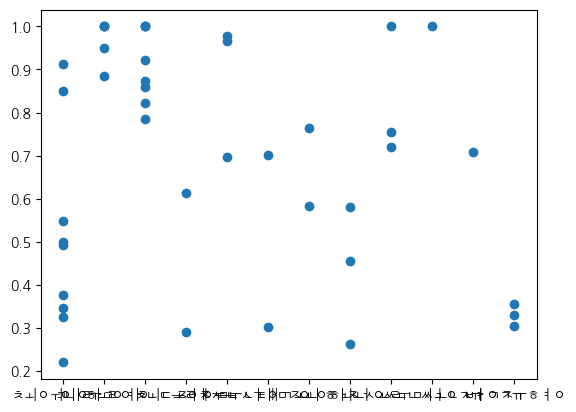

In [88]:
subdf = subdata.loc[subdata['name'] == '회계원리(1)']

plt.scatter(subdf['prof'], subdf['prob_success'])
